In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix, recall_score

In [2]:
sheet_id = "2PACX-1vQVwufwTS_hzCEUwRNNS_Qq00Sr5r64nMs-iOuF45a2C7tIJ9n5CE6xgA_E8hvVmFc2gfRiU8ljH3Lo"
url = f"https://docs.google.com/spreadsheets/d/e/2PACX-1vQVwufwTS_hzCEUwRNNS_Qq00Sr5r64nMs-iOuF45a2C7tIJ9n5CE6xgA_E8hvVmFc2gfRiU8ljH3Lo/pub?output=csv"
df = pd.read_csv(url)


In [3]:
le_asset = LabelEncoder()
le_regime = LabelEncoder()
df['asset_type'] = le_asset.fit_transform(df['asset_type'])
df['market_regime'] = le_regime.fit_transform(df['market_regime'])
le_regime.fit_transform(df['market_regime'])

x = df.drop('future_trend', axis = 1)
y = df['future_trend']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression(random_state = 42)
lr.fit(x_train_scaled, y_train)
lr_pred = lr.predict(x_test_scaled)

In [13]:
mlp = MLPClassifier(hidden_layer_sizes = (100,50,20), max_iter = 5000, alpha = 0.01)
mlp.fit(x_train_scaled, y_train)
mn_pred = mlp.predict(x_test_scaled)


Logistic:
Accuracy : 0.925
Precision: 0.949
Recall   : 0.974
F1-score : 0.961


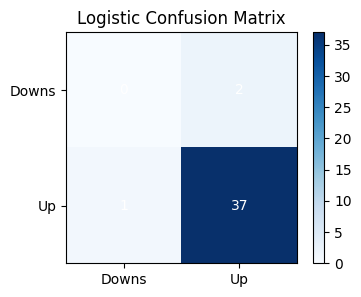


Nueral Net:
Accuracy : 0.950
Precision: 0.950
Recall   : 1.000
F1-score : 0.974


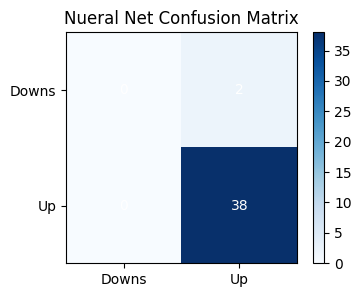

In [14]:
def results(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize = (4,3))
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    plt.title(f'{name} Confusion Matrix')
    plt.xticks([0,1], ['Downs', 'Up'])
    plt.yticks([0,1], ['Downs', 'Up'])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha = 'center', va = 'center', color ='white')
    plt.show()
    return acc, prec, rec, f1
lr_res = results(y_test, lr_pred, "Logistic")
mn_res = results(y_test, mn_pred, "Nueral Net")

In [16]:

print(f"Logistic: Acc={lr_res[0]:.10f} F1={lr_res[3]:.10f}")
print(f"Neural:   Acc={mn_res[0]:.10f} F1={mn_res[3]:.10f}")




Logistic: Acc=0.9250000000 F1=0.9610389610
Neural:   Acc=0.9500000000 F1=0.9743589744
